In [1]:
%run ../../shared_setup.ipynb

The Cython magic has been move to the Cython package, hence 
`%load_ext cythonmagic` is deprecated; Please use `%load_ext Cython` instead.

Though, because I am nice, I'll still try to load it for you this time.


In [2]:
wgaln_dir = '/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006'
!ls -lh {wgaln_dir}

total 322M
drwxrwxr-x 5 aliman aliman 4.0K Apr  8 16:44 bwamem
drwxrwxr-x 5 aliman aliman 4.0K Apr  8 16:35 bwasw
drwxrwxr-x 5 aliman aliman 4.0K Apr  8 16:00 lastz
drwxrwxr-x 5 aliman aliman 4.0K Apr  8 11:28 mummer
-rw-rw-r-- 1 aliman aliman  14M Apr  7 11:45 plasmodium_falciparum__isolate_7g8__1_contigs.fasta
-rw-rw-r-- 1 aliman aliman   16 Apr  8 16:32 plasmodium_falciparum__isolate_7g8__1_contigs.fasta.amb
-rw-rw-r-- 1 aliman aliman 1.1M Apr  8 16:32 plasmodium_falciparum__isolate_7g8__1_contigs.fasta.ann
-rw-rw-r-- 1 aliman aliman  13M Apr  8 16:32 plasmodium_falciparum__isolate_7g8__1_contigs.fasta.bwt
-rw-rw-r-- 1 aliman aliman  13M Apr  8 11:31 plasmodium_falciparum__isolate_7g8__1_contigs.fasta.flat
-rw-rw-r-- 1 aliman aliman 234K Apr  8 11:31 plasmodium_falciparum__isolate_7g8__1_contigs.fasta.gdx
-rw-rw-r-- 1 aliman aliman 3.2M Apr  8 16:32 plasmodium_falciparum__isolate_7g8__1_contigs.fasta.pac
-rw-rw-r-- 1 aliman aliman 6.4M Apr  8 16:32 plasmodium_falciparum__isolate_7g8

In [3]:
!ls -lh {wgaln_dir}/bwamem/*

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_7g8:
total 16M
-rw-rw-r-- 1 aliman aliman 677 Apr  8 16:48 3d7_7g8.log
-rw-rw-r-- 1 aliman aliman 16M Apr  8 16:48 3d7_7g8.sam

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_dd2:
total 33M
-rw-rw-r-- 1 aliman aliman 679 Apr  8 16:51 3d7_dd2.log
-rw-rw-r-- 1 aliman aliman 33M Apr  8 16:51 3d7_dd2.sam

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3:
total 36M
-rw-rw-r-- 1 aliman aliman 807 Apr  8 16:52 3d7_hb3.log
-rw-rw-r-- 1 aliman aliman 36M Apr  8 16:52 3d7_hb3.sam


In [5]:
!cat {wgaln_dir}/bwamem/3d7_hb3/3d7_hb3.log

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 752 sequences (10008223 bp)...
[M::process] read 866 sequences (10007680 bp)...
[M::mem_process_seqs] Processed 752 reads in 118.676 CPU sec, 118.671 real sec
[M::process] read 1353 sequences (3415483 bp)...
[M::mem_process_seqs] Processed 866 reads in 193.571 CPU sec, 193.758 real sec
[M::mem_process_seqs] Processed 1353 reads in 63.505 CPU sec, 63.486 real sec
[main] Version: 0.7.12-r1039
[main] CMD: /data/plasmodium/pfalciparum/pf-crosses/opt/bwa-0.7.12/bwa mem -M /data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/Pf3D7_v3.lookseq.fa /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/plasmodium_falciparum__isolate_hb3__1_contigs.fasta
[main] Real time: 376.160 sec; CPU: 375.949 sec


## Variant calling

In [6]:
samtools = '/data/plasmodium/pfalciparum/pf-crosses/opt/samtools-1.2/samtools'
!{samtools}


Program: samtools (Tools for alignments in the SAM format)
Version: 1.2 (using htslib 1.2.1)

Usage:   samtools <command> [options]

Commands:
  -- indexing
         faidx       index/extract FASTA
         index       index alignment
  -- editing
         calmd       recalculate MD/NM tags and '=' bases
         fixmate     fix mate information
         reheader    replace BAM header
         rmdup       remove PCR duplicates
         targetcut   cut fosmid regions (for fosmid pool only)
  -- file operations
         bamshuf     shuffle and group alignments by name
         cat         concatenate BAMs
         merge       merge sorted alignments
         mpileup     multi-way pileup
         sort        sort alignment file
         split       splits a file by read group
         bam2fq      converts a BAM to a FASTQ
  -- stats
         bedcov      read depth per BED region
         depth       compute the depth
         flagstat    simple stats
         idxstats    BAM index stats


In [7]:
bcftools = '/data/plasmodium/pfalciparum/pf-crosses/opt/bcftools-1.2/bcftools'
!{bcftools}


Program: bcftools (Tools for variant calling and manipulating VCFs and BCFs)
Version: 1.2 (using htslib 1.2.1)

Usage:   bcftools <command> <argument>

Commands:

 -- Indexing
    index        index VCF/BCF files

 -- VCF/BCF manipulation
    annotate     annotate and edit VCF/BCF files
    concat       concatenate VCF/BCF files from the same set of samples
    convert      convert VCF/BCF files to different formats and back
    isec         intersections of VCF/BCF files
    merge        merge VCF/BCF files files from non-overlapping sample sets
    norm         left-align and normalize indels
    plugin       user-defined plugins
    query        transform VCF/BCF into user-defined formats
    reheader     modify VCF/BCF header, change sample names
    view         VCF/BCF conversion, view, subset and filter VCF/BCF files

 -- VCF/BCF analysis
    call         SNP/indel calling
    consensus    create consensus sequence by applying VCF variants
    filter       filter VCF/BCF files 

In [8]:
fasta_fn = '/data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/Pf3D7_v3.lookseq.fa'
genome = pyfasta.Fasta(fasta_fn)

In [9]:
!{samtools} faidx {fasta_fn}

In [12]:
method = 'bwamem'
alignment = '3d7_hb3'
sam_fn = os.path.join(wgaln_dir, method, alignment, '%s.sam' % alignment)
!ls -lh {sam_fn}
bam_fn = sam_fn[:-3] + 'bam'
!ls -lh {bam_fn}

-rw-rw-r-- 1 aliman aliman 36M Apr  8 16:52 /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.sam
ls: cannot access /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.bam: No such file or directory


In [13]:
!{samtools} sort

Usage: samtools sort [options...] [in.bam]
Options:
  -l INT     Set compression level, from 0 (uncompressed) to 9 (best)
  -m INT     Set maximum memory per thread; suffix K/M/G recognized [768M]
  -n         Sort by read name
  -o FILE    Write final output to FILE rather than standard output
  -O FORMAT  Write output as FORMAT ('sam'/'bam'/'cram')   (either -O or
  -T PREFIX  Write temporary files to PREFIX.nnnn.bam       -T is required)
  -@ INT     Set number of sorting and compression threads [1]

Legacy usage: samtools sort [options...] <in.bam> <out.prefix>
Options:
  -f         Use <out.prefix> as full final filename rather than prefix
  -o         Write final output to stdout rather than <out.prefix>.bam
  -l,m,n,@   Similar to corresponding options above


In [14]:
if not os.path.exists(bam_fn):
    !{samtools} sort -O bam {sam_fn} -T tmp > {bam_fn}
    !{samtools} index {bam_fn}

In [15]:
def plot_coverage(bam_fn, chrom):
    bam = pysam.AlignmentFile(bam_fn)
    cov = pysamstats.load_coverage(bam, chrom=chrom, pad=True)
    fig, ax = plt.subplots(figsize=(9, 1))
    sns.despine(ax=ax, offset=10)
    seq = np.asarray(genome[chrom])
    x = cov.pos
    y = cov.reads_all
    ax.fill_between(x, 0, y, color='k')
    ax.set_xlim(0, len(seq))
    ax.set_ylim(0, 3)
    ax.set_yticks([0, 1, 2, 3])
    ax.grid(axis='y')
    ax.set_title(chrom);

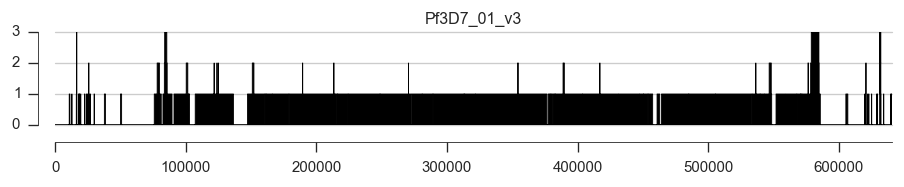

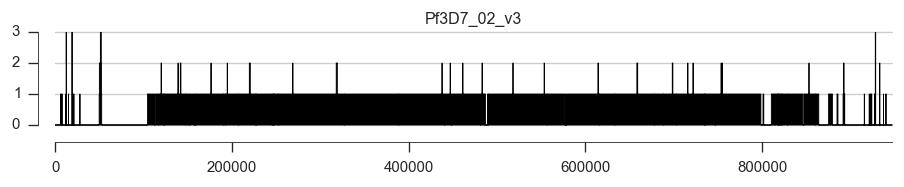

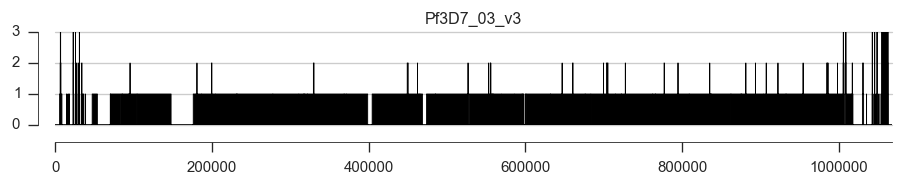

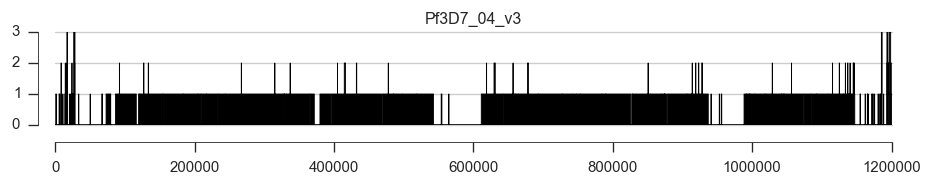

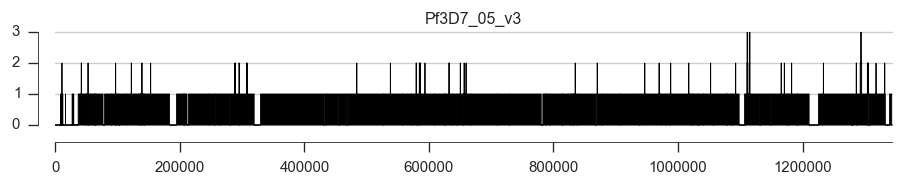

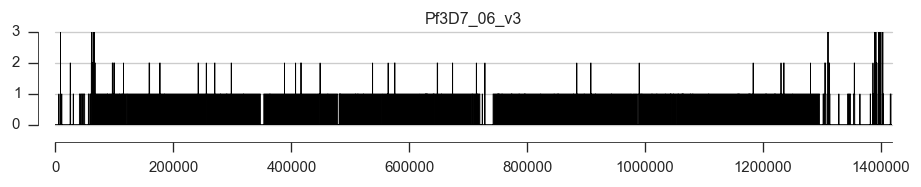

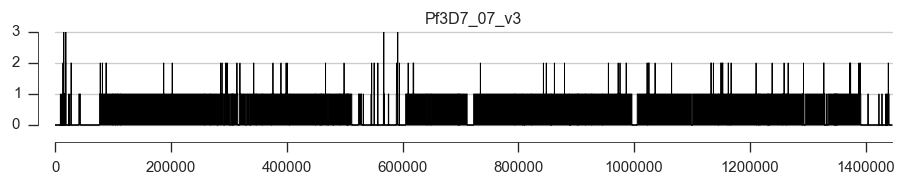

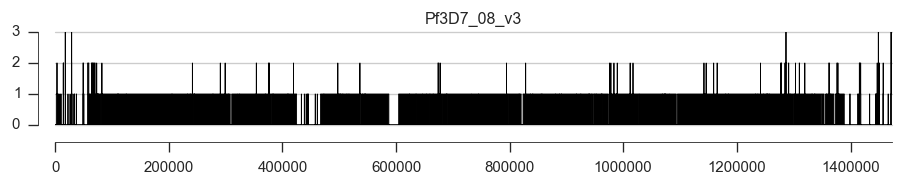

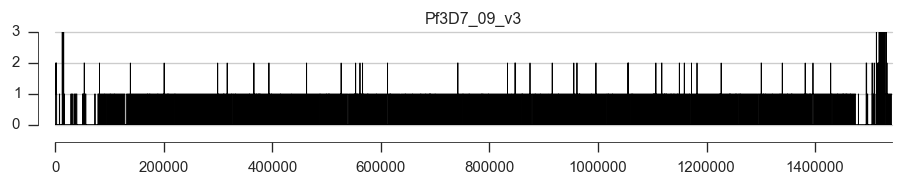

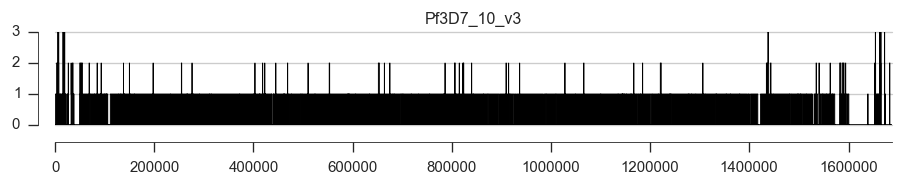

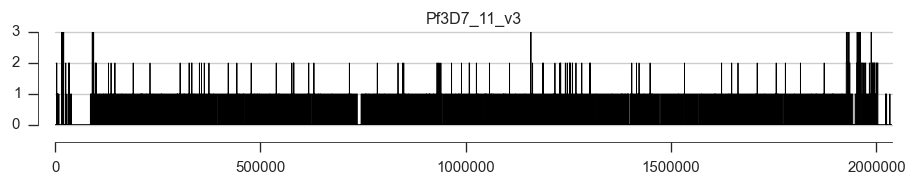

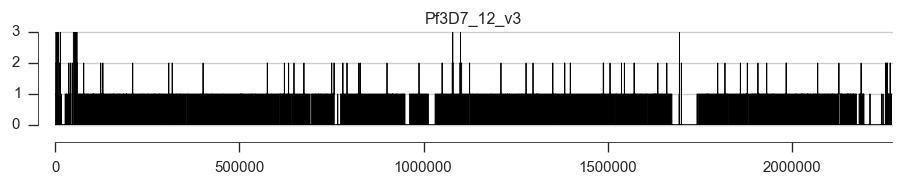

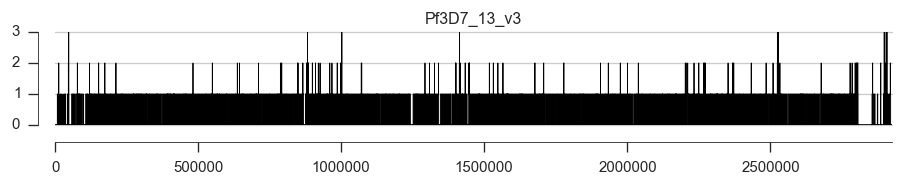

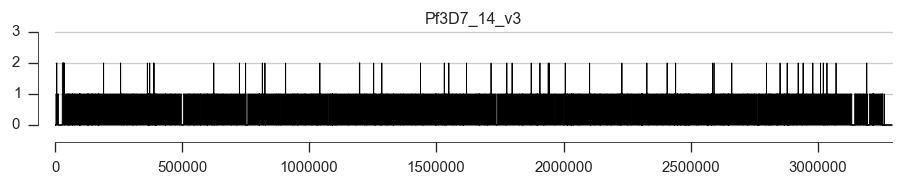

In [16]:
for chrom in CHROMOSOMES:
    plot_coverage(bam_fn, str(chrom, 'ascii'))
    plt.show()

In [17]:
!{samtools} mpileup


Usage: samtools mpileup [options] in1.bam [in2.bam [...]]

Input options:
  -6, --illumina1.3+      quality is in the Illumina-1.3+ encoding
  -A, --count-orphans     do not discard anomalous read pairs
  -b, --bam-list FILE     list of input BAM filenames, one per line
  -B, --no-BAQ            disable BAQ (per-Base Alignment Quality)
  -C, --adjust-MQ INT     adjust mapping quality; recommended:50, disable:0 [0]
  -d, --max-depth INT     max per-BAM depth; avoids excessive memory usage [250]
  -E, --redo-BAQ          recalculate BAQ on the fly, ignore existing BQs
  -f, --fasta-ref FILE    faidx indexed reference sequence file
  -G, --exclude-RG FILE   exclude read groups listed in FILE
  -l, --positions FILE    skip unlisted positions (chr pos) or regions (BED)
  -q, --min-MQ INT        skip alignments with mapQ smaller than INT [0]
  -Q, --min-BQ INT        skip bases with baseQ/BAQ smaller than INT [13]
  -r, --region REG        region in which pileup is generated
  -R, --ignore-

In [18]:
!{bcftools} call


About:   SNP/indel variant calling from VCF/BCF. To be used in conjunction with samtools mpileup.
         This command replaces the former "bcftools view" caller. Some of the original
         functionality has been temporarily lost in the process of transition to htslib,
         but will be added back on popular demand. The original calling model can be
         invoked with the -c option.
Usage:   bcftools call [options] <in.vcf.gz>

File format options:
   -o, --output <file>             write output to a file [standard output]
   -O, --output-type <b|u|z|v>     output type: 'b' compressed BCF; 'u' uncompressed BCF; 'z' compressed VCF; 'v' uncompressed VCF [v]
   -r, --regions <region>          restrict to comma-separated list of regions
   -R, --regions-file <file>       restrict to regions listed in a file
   -s, --samples <list>            list of samples to include [all samples]
   -S, --samples-file <file>       PED file or a file with optional second column for ploidy (0, 1

In [19]:
samples_fn = bam_fn + '.samples'
if not os.path.exists(samples_fn):
    with open(samples_fn, 'wt') as f:
        print('%s\t%s' % (bam_fn, 1), file=f)
!cat {samples_fn}

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.bam	1


In [20]:
raw_vcf_fn = bam_fn[:-3] + 'bcftools_m.vcf.gz'
raw_vcf_fn

'/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.bcftools_m.vcf.gz'

In [21]:
if not os.path.exists(raw_vcf_fn):
    !{samtools} mpileup -u --vcf -A -B -C0 -x --fasta-ref {fasta_fn} {bam_fn} \
        | {bcftools} call - -m -O v -S {samples_fn} -v \
        | bgzip -c > {raw_vcf_fn}
    !tabix -p vcf {raw_vcf_fn}

[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000


In [22]:
gatk_jar = '/data/plasmodium/pfalciparum/pf-crosses/opt/GenomeAnalysisTK-3.3-0/GenomeAnalysisTK.jar'

In [23]:
!java -version

java version "1.7.0_25"
Java(TM) SE Runtime Environment (build 1.7.0_25-b15)
Java HotSpot(TM) 64-Bit Server VM (build 23.25-b01, mixed mode)


In [24]:
fasta_fn

'/data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/Pf3D7_v3.lookseq.fa'

In [25]:
#!java -Xmx2G -jar {picard_dir}/CreateSequenceDictionary.jar R={fasta_fn} O={fasta_fn[:-2] + 'dict'}

In [26]:
gatk = 'java -Xmx2G -jar {gatk_jar} -R {fasta_fn}'.format(**locals())
gatk

'java -Xmx2G -jar /data/plasmodium/pfalciparum/pf-crosses/opt/GenomeAnalysisTK-3.3-0/GenomeAnalysisTK.jar -R /data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/Pf3D7_v3.lookseq.fa'

In [27]:
!{gatk} --help

--------------------------------------------------------------------------------
The Genome Analysis Toolkit (GATK) v3.3-0-g37228af, Compiled 2014/10/24 01:07:22
Copyright (c) 2010 The Broad Institute
For support and documentation go to http://www.broadinstitute.org/gatk
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
usage: java -jar GenomeAnalysisTK.jar -T <analysis_type> [-args <arg_file>] [-I <input_file>] [-rbs <read_buffer_size>] [-et 
       <phone_home>] [-K <gatk_key>] [-tag <tag>] [-rf <read_filter>] [-L <intervals>] [-XL <excludeIntervals>] [-isr 
       <interval_set_rule>] [-im <interval_merging>] [-ip <interval_padding>] [-R <reference_sequence>] [-ndrs] [-maxRuntime 
       <maxRuntime>] [-maxRuntimeUnits <maxRuntimeUnits>] [-dt <downsampling_type>] [-dfrac <downsample_to_fraction>] [-dcov 
       <downsample_to_coverage>] [-baq <baq>] [-baqGOP <baqGapOpenPen

In [28]:
laat_vcf_fn = bam_fn[:-3] + 'laat.vcf.gz'
laat_vcf_fn

'/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.laat.vcf.gz'

In [29]:
!ls -l {raw_vcf_fn}

-rw-rw-r-- 1 aliman aliman 793630 Apr 10 11:00 /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.bcftools_m.vcf.gz


In [30]:
#!rm -v {laat_vcf_fn}*

In [31]:
if not os.path.exists(laat_vcf_fn):
    !{gatk} -T LeftAlignAndTrimVariants -V {raw_vcf_fn} -trim -o {laat_vcf_fn[:-3]}
    !bgzip {laat_vcf_fn[:-3]} && tabix -p vcf {laat_vcf_fn}

INFO  11:00:14,643 HelpFormatter - -------------------------------------------------------------------------------- 
INFO  11:00:14,646 HelpFormatter - The Genome Analysis Toolkit (GATK) v3.3-0-g37228af, Compiled 2014/10/24 01:07:22 
INFO  11:00:14,646 HelpFormatter - Copyright (c) 2010 The Broad Institute 
INFO  11:00:14,647 HelpFormatter - For support and documentation go to http://www.broadinstitute.org/gatk 
INFO  11:00:14,652 HelpFormatter - Program Args: -R /data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/Pf3D7_v3.lookseq.fa -T LeftAlignAndTrimVariants -V /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.bcftools_m.vcf.gz -trim -o /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/bwamem/3d7_hb3/3d7_hb3.laat.vcf 
INFO  11:00:14,656 HelpFormatter - Executing as aliman@skyros on Linux 3.16.0-33-generic amd64; Java HotSpot(TM) 64-Bit Server VM 1.7.0_25-b15. 
INFO  11:00:14,656 HelpFormatter - D